In [67]:
Unif, LF, LFavg, EF = r"Uniform policy ($\pi_{\mathrm{unif}}$)", "LF-PGS", "LF-PGS-avg", r"$\mathbf{EpiRC\operatorname{-}PGS\;(Ours)}$"

linestyle = {Unif: '--', LF: ':', LFavg: '-', EF: '-'} 
marker = {Unif: 'P', LF: 'X', LFavg: '*', EF: 'o'}
markersize = {Unif: 100, LF: 140, LFavg: 200, EF: 60}
alphas = {Unif: 1.0, LF: 0.6, LFavg: 1.0, EF: 1.0} 
colors = {Unif: "C0", LF: "C1", LFavg: "C2", EF: "C4"} 

performance_label = r"Objective Return"
violation_label = r"Constraint Violation"
iteration_label = r"Outer Iteration $k$"

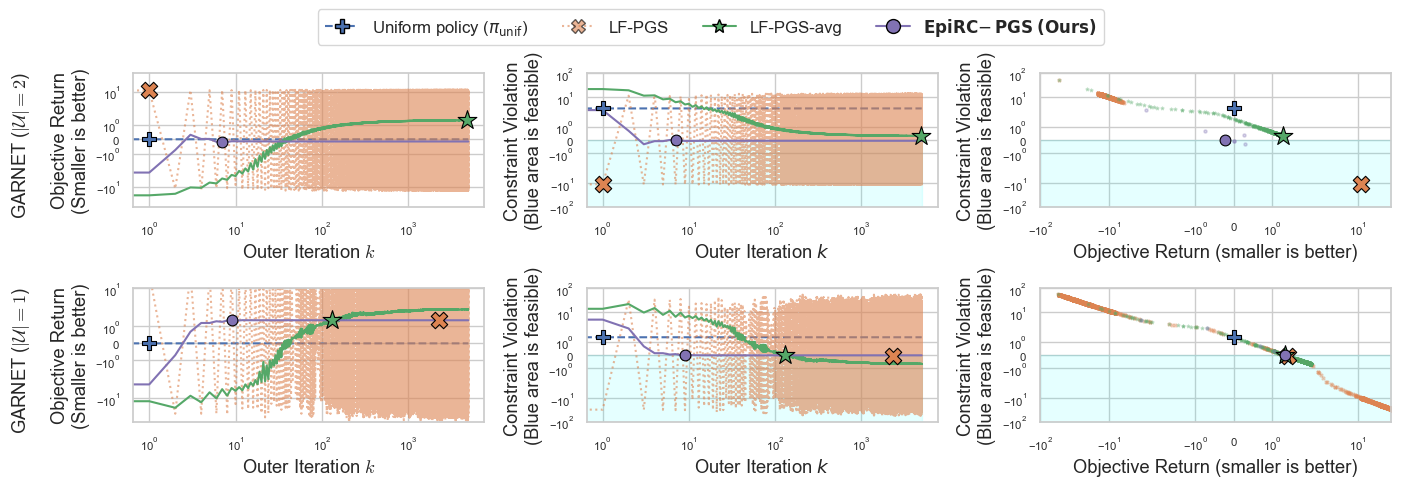

In [71]:
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"

fig = plt.figure(figsize=(14, 4.5))
sns.set_theme(font_scale=1.1)
axes = []
ticksize = 8

best_idx = {}  # to report the best index of each algorithms

# ===== Plot 1 ===== 

FIGNAME = "finite/garnet-env-9-4-2-2-0.991"

with open(f"results/{FIGNAME}.pkl", "rb") as f:
    algos = pickle.load(f)


# plot objective return vs violation
with sns.axes_style("whitegrid"):
    ax = fig.add_subplot(233)
    ax.fill_between(x=[-100, 100], y1=-100, y2=0, color="cyan", alpha=0.1)
    for name, J_v in algos.items():
        J_list, v_list = J_v
        J, v = J_list.mean(axis=0), v_list.mean(axis=0)
        plt.scatter(J, v, marker=marker[name], s=5, color=colors[name], alpha=0.3)

        # if a feasible policy exist, emphasize the best policy
        if np.sum(v <= 0) > 0:  
            vio_J = np.where(v <= 0, J, np.infty)
            best_idx[name] = np.argmin(vio_J)
        else:
            best_idx[name] = np.argmin(v)
        if name == Unif:
            best_idx[name] = 1
        plt.scatter(J[best_idx[name]], v[best_idx[name]], marker=marker[name], color=colors[name], s=markersize[name], edgecolors="black", linewidths=0.8, zorder=2)

    plt.xscale("symlog")
    plt.yscale("symlog")
    plt.ylim(-100, 100)
    plt.xlim(-100, 30)
    plt.ylabel("Constraint Violation" "\n" r"(Blue area is feasible)")
    plt.xlabel("Objective Return (smaller is better)")
    plt.rcParams["mathtext.fontset"] = 'dejavusans'
    ax.tick_params(axis='both', which='major', labelsize=ticksize)


# plot violation
with sns.axes_style("whitegrid"):
    ax = fig.add_subplot(232)
    ax.fill_between(x=[0, 5000], y1=-100, y2=0, color="cyan", alpha=0.1)
    for name, J_v in algos.items():
        J_list, v_list = J_v
        J, v = J_list.mean(axis=0), v_list.mean(axis=0)
        plt.plot(np.arange(len(v)), v,  label=name, linestyle=linestyle[name], alpha=alphas[name], color=colors[name], zorder=1)
        plt.scatter(best_idx[name], v[best_idx[name]], marker=marker[name], color=colors[name], s=markersize[name], edgecolors="black", linewidths=0.8, zorder=2)

    plt.xscale("log")
    plt.yscale("symlog")
    plt.ylim(-100, 100)
    plt.ylabel("Constraint Violation" "\n" r"(Blue area is feasible)")
    plt.rcParams["mathtext.fontset"] = 'cm'
    plt.xlabel(iteration_label)
    ax.tick_params(axis='both', which='major', labelsize=ticksize)


# plot objective return
with sns.axes_style("whitegrid"):
    ax = fig.add_subplot(231)

    for name, J_v in algos.items():
        J_list, v_list = J_v
        J, v = J_list.mean(axis=0), v_list.mean(axis=0)
        plt.plot(np.arange(len(J)), J,  label=name, linestyle=linestyle[name], alpha=alphas[name], color=colors[name], zorder=1)
        plt.scatter(best_idx[name], J[best_idx[name]], marker=marker[name], color=colors[name], s=markersize[name], edgecolors="black", linewidths=0.8, zorder=2)

    plt.ylim(None, 50)
    plt.xscale("log")
    plt.yscale("symlog")
    obj_label = plt.ylabel("Objective Return" "\n" "(Smaller is better)")
    plt.xlabel(iteration_label)
    ax.tick_params(axis='both', which='major', labelsize=ticksize)

    title = ax.set_title(r"GARNET ($|\mathcal{U}|=2$)", rotation="vertical", x=-0.32, y=-0.1)


# ===== Plot 2 ===== 

FIGNAME = "finite/garnet-env-9-4-2-1-0.991"

with open(f"results/{FIGNAME}.pkl", "rb") as f:
    algos = pickle.load(f)

# plot objective return vs violation
with sns.axes_style("whitegrid"):
    ax = fig.add_subplot(236)
    ax.fill_between(x=[-100, 100], y1=-100, y2=0, color="cyan", alpha=0.1)
    for name, J_v in algos.items():
        J_list, v_list = J_v
        J, v = J_list.mean(axis=0), v_list.mean(axis=0)
        plt.scatter(J, v, marker=marker[name], s=5, color=colors[name], alpha=0.3)

        # if a feasible policy exist, emphasize the best policy
        if np.sum(v <= 0) > 0:  
            vio_J = np.where(v <= 0, J, np.infty)
            best_idx[name] = np.argmin(vio_J)
        else:
            best_idx[name] = np.argmin(v)
        
        if name == Unif:
            best_idx[name] = 1
        plt.scatter(J[best_idx[name]], v[best_idx[name]], marker=marker[name], color=colors[name], s=markersize[name], edgecolors="black", linewidths=0.8, zorder=2)

    plt.xscale("symlog")
    plt.yscale("symlog")
    plt.ylim(-100, 100)
    plt.xlim(-100, 30)
    plt.ylabel("Constraint Violation" "\n" r"(Blue area is feasible)")
    plt.xlabel("Objective Return (smaller is better)")
    plt.rcParams["mathtext.fontset"] = 'dejavusans'
    ax.tick_params(axis='both', which='major', labelsize=ticksize)


# plot violation
with sns.axes_style("whitegrid"):
    ax = fig.add_subplot(235)
    ax.fill_between(x=[0, 5000], y1=-100, y2=0, color="cyan", alpha=0.1)
    for name, J_v in algos.items():
        J_list, v_list = J_v
        J, v = J_list.mean(axis=0), v_list.mean(axis=0)
        plt.plot(np.arange(len(v)), v, label=name, linestyle=linestyle[name], alpha=alphas[name], color=colors[name], zorder=1)
        plt.scatter(best_idx[name], v[best_idx[name]], marker=marker[name], color=colors[name], s=markersize[name], edgecolors="black", linewidths=0.8, zorder=2)
    plt.xscale("log")
    plt.yscale("symlog")
    plt.ylim(-100, 100)
    plt.ylabel("Constraint Violation" "\n" r"(Blue area is feasible)")
    plt.rcParams["mathtext.fontset"] = 'cm'
    plt.xlabel(iteration_label)
    ax.tick_params(axis='both', which='major', labelsize=ticksize)


# plot objective return
with sns.axes_style("whitegrid"):
    ax = fig.add_subplot(234)

    for name, J_v in algos.items():
        J_list, v_list = J_v
        J, v = J_list.mean(axis=0), v_list.mean(axis=0)
        plt.plot(np.arange(len(J)), J,  label=name, linestyle=linestyle[name], alpha=alphas[name], color=colors[name], zorder=1)
        plt.scatter(best_idx[name], J[best_idx[name]], marker=marker[name], color=colors[name], s=markersize[name], edgecolors="black", linewidths=0.8, zorder=2)
    plt.ylim(None, 10)
    plt.xscale("log")
    plt.yscale("symlog")
    plt.ylabel("Objective Return" "\n" "(Smaller is better)")
    plt.xlabel(iteration_label)
    ax.tick_params(axis='both', which='major', labelsize=ticksize)

    title = ax.set_title(r"GARNET ($|\mathcal{U}|=1$)", rotation="vertical", x=-0.32, y=-0.1)

# ===== Legend =====

with sns.axes_style("whitegrid"):
    plt.rcParams["mathtext.fontset"] = 'dejavusans'
    labels = [Unif, LF, LFavg, EF]
    handles = []
    for name in labels:
        handles.append(
            plt.plot([], label=name, linestyle=linestyle[name], alpha=alphas[name], color=colors[name], marker=marker[name], markersize=10, markeredgecolor="black")[0]
        )
    lgd = fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, 1.1), ncol=len(labels))

fig.tight_layout()

plt.savefig(f"results/all.pdf", bbox_extra_artists=(lgd, ), bbox_inches="tight")
plt.savefig(f"results/all.png", bbox_extra_artists=(lgd, ), bbox_inches="tight")

